In [114]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
cd /mnt/data_sata_2t/vsftpd/wxq/ftp/files/190114

/mnt/data_sata_2t/vsftpd/wxq/ftp/files/190114


In [29]:
%%bash

samtools depth -b target.bed -m 0 -q 20 -Q 20 HY19019786.bam > HY19019786.depth
samtools depth -b target.bed -m 0 -q 20 -Q 20 HY19019784.bam > HY19019784.depth
samtools depth -b target.bed -m 0 -q 20 -Q 20 HY19019783.bam > HY19019783.depth

parallel --xapply 'samtools depth -b Agilent_V7.bed -m 0 -q 20 -Q 20 {}.bam > {}.depth' :::: v7list
parallel --xapply 'samtools depth -b HESone5000.bed -m 0 -q 20 -Q 20 {}.bam > {}.depth' :::: HESone5000list

In [64]:
df1 = pd.read_table('HY19019786.depth', names=['chr', 'pos', 'HY19019786'])
df2 = pd.read_table('HY19019784.depth', names=['chr', 'pos', 'HY19019784'])
df3 = pd.read_table('HY19019783.depth', names=['chr', 'pos', 'HY19019783'])
df = df1.merge(df2, on=['chr', 'pos'], how='outer')
df = df.merge(df3, on=['chr', 'pos'])

with open('v7list', 'r') as f:
    l = f.read(f).split('\n')
    df = pd.DataFrame({'chr':[], 'pos':[]})
    for i,s in enumerate(l):
        df = df.merge(pd.read_table('%s.depth'%(s), names=['chr', 'pos', '%s'%(s)]))

/home/jgs/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [94]:
np.linspace(0,100,51)

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100.])

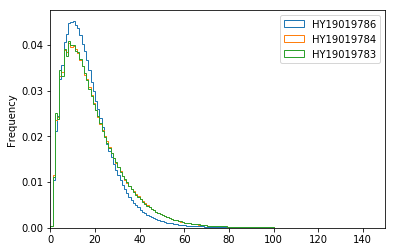

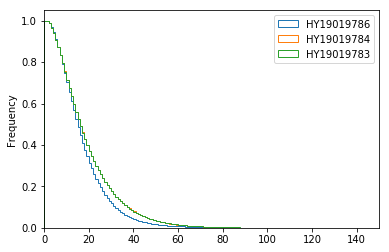

In [101]:
df[['HY19019786', 'HY19019784', 'HY19019783']].plot(kind='hist', bins=np.linspace(0,100,101), xlim=[0,150], density=1, histtype='step')
df[['HY19019786', 'HY19019784', 'HY19019783']].plot(kind='hist', bins=np.linspace(0,100,101), xlim=[0,150], density=1, histtype='step', cumulative=-1)


In [12]:
with pm.Model() as poisson:
    p = pm.Poisson('p',)

In [14]:
with poisson:
    sample = pm.sample(1000)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:00<00:00, 8003.43draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [103]:
df[['HY19019786', 'HY19019784', 'HY19019783']].mode()

,HY19019786,HY19019784,HY19019783
0,10,8,8


In [104]:
from scipy import stats

In [130]:
test = df[['HY19019786']].sample(1000).values
test.mean()
stats.kstest(test, 'poisson', (test.mean(),))
stats.kstest(test, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [ ]:
ax = sns.distplot(df[['HY19019786']], fit=stats.beta, bins=np.linspace(0,100,101), kde=False)
ax.set(xlim=(0, 150))

/home/jgs/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [1]:
import pandas as pd